In [1]:
ENV["JULIA_PKG_SERVER"] = ""
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using MLJBase: machine, transform
using TableTransforms
using Imbalance

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.12897177983538477, 0.6863866635957644, 0.9452279486233184, 0.6135953031731222, 0.7393683025755258, 0.49776424409145725, 0.6193417397007426, 0.363826187287986, 0.7584295856669816, 0.2184451048446261], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.4479438784027816, 0.23004681363952995, 0.021532597906190776, 0.8482825697641306, 0.10773487816863903, 0.32189982199036116, 0.9651330791713363, 0.18080927897651633, 0.2907506630258835, 0.36872799387588473], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

### 2. Apply Cluster Undersampler

#### Using Imbalance Only

In [3]:
X_under, y_under = cluster_undersample(
	X,
	y;
	mode = "center",
	ratios = Dict(0 => 1.0, 1 => 1.0, 2 => 0.9),
	rng = 42,
)

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:02


((Column1 = [0.5823324489494826, 0.8509699606936779, 0.6690262923527208, 0.7251739704102262, 0.3360029737933717, 0.9695150609084499, 0.143605530463025, 0.19497685302940124, 0.9848878347210348, 0.3978893794694215  …  0.17270554743724298, 0.8963696919829013, 0.5441482812064661, 0.9452279486233184, 0.19457972730796763, 0.7679777704801435, 0.1852783785870693, 0.8892332330408234, 0.046782892974334134, 0.5221848498989414], Column2 = [0.6665452736560249, 0.4226838161395962, 0.05724109413521372, 0.17722088023128768, 0.8260438486177838, 0.6636644264313925, 0.3997488573860836, 0.5951830286536751, 0.6368862414922253, 0.18955325693901084  …  0.8480305241948735, 0.7151946665095478, 0.019763528714939915, 0.021532597906190776, 0.508661499834145, 0.32095870864154413, 0.22170985093210338, 0.19272132336206282, 0.687746776535413, 0.31159903668031563], Column3 = [0.12301344304487444, 0.1344701118716896, 0.46335852995449106, 0.7285728716295062, 0.7849240555488212, 0.06546916714160167, 0.47546521585839085, 

#### Using MLJ

In [4]:
naive_model = Imbalance.MLJ.ClusterUndersampler(
	mode = "center",
	ratios = Dict(0 => 1.0, 1 => 1.0, 2 => 0.9),
	maxiter = 50,
	rng = 42,
)
mach = machine(naive_model)
X_under, y_under = transform(mach, X, y)

((Column1 = [0.5823324489494826, 0.8509699606936779, 0.6690262923527208, 0.7251739704102262, 0.3360029737933717, 0.9695150609084499, 0.143605530463025, 0.19497685302940124, 0.9848878347210348, 0.3978893794694215  …  0.17270554743724298, 0.8963696919829013, 0.5441482812064661, 0.9452279486233184, 0.19457972730796763, 0.7679777704801435, 0.1852783785870693, 0.8892332330408234, 0.046782892974334134, 0.5221848498989414], Column2 = [0.6665452736560249, 0.4226838161395962, 0.05724109413521372, 0.17722088023128768, 0.8260438486177838, 0.6636644264313925, 0.3997488573860836, 0.5951830286536751, 0.6368862414922253, 0.18955325693901084  …  0.8480305241948735, 0.7151946665095478, 0.019763528714939915, 0.021532597906190776, 0.508661499834145, 0.32095870864154413, 0.22170985093210338, 0.19272132336206282, 0.687746776535413, 0.31159903668031563], Column3 = [0.12301344304487444, 0.1344701118716896, 0.46335852995449106, 0.7285728716295062, 0.7849240555488212, 0.06546916714160167, 0.47546521585839085, 

#### Using TableTransforms

In [5]:
using Imbalance: TableTransforms.ClusterUndersampler
model_t = ClusterUndersampler(
	y_ind,
	mode = "nearest",
	ratios = Dict(0 => 1.0, 1 => 0.9, 2 => 1.0),
	maxiter = 50,
	rng = 42,
)
Xyover = Xy |> model_t

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:01



Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
  class:  2.0


(Column1 = [0.4876832145857365, 0.907410564584128, 0.7839550064174631, 0.6863866635957644, 0.38151531645113124, 0.9695150609084499, 0.19934942931986965, 0.35969402837473463, 0.9848878347210348, 0.3467415729179013  …  0.8963696919829013, 0.5441482812064661, 0.9452279486233184, 0.12897177983538477, 0.9153753178220317, 0.1852783785870693, 0.8892332330408234, 0.046782892974334134, 0.5466054557064257, 0.6301284079514171],
 Column2 = [0.6683751533856677, 0.5598733934174821, 0.020998560449319137, 0.23004681363952995, 0.8994084028844664, 0.6636644264313925, 0.31029629026975525, 0.5612819555303167, 0.6368862414922253, 0.20874452928568255  …  0.7151946665095478, 0.019763528714939915, 0.021532597906190776, 0.4479438784027816, 0.2787942224536374, 0.22170985093210338, 0.19272132336206282, 0.687746776535413, 0.3012982513702701, 0.3933312404451116],
 Column3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 Column4 = [0.10222821775713775, 0.22

### 3. Plot the Results

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


    Updating `~/Documents/GitHub/Imbalance.jl/examples/simple_examples/Project.toml`
  [5ae59095] + Colors v0.12.10
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/simple_examples/Manifest.toml`


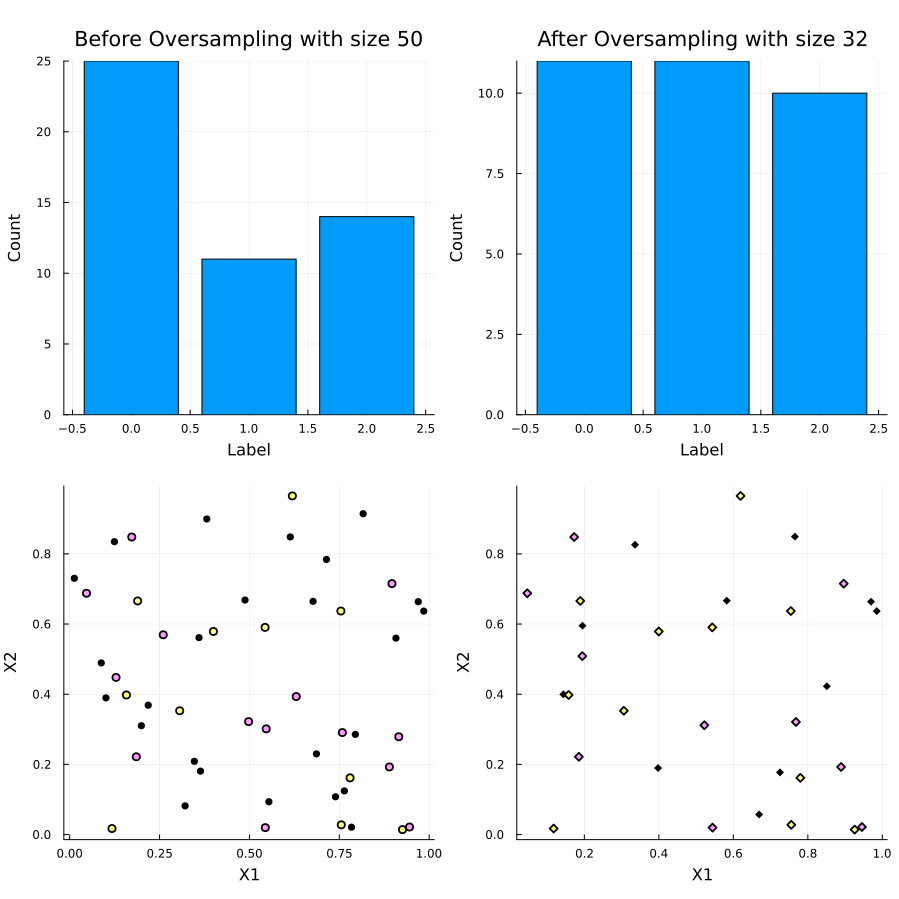

In [5]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, y_under, X, X_under)